# Blood only analysis
---
Evaluate the performance of different models when training on the subset of the data containing only gene expression from blood.

In [12]:
%%bash
PLIER_OUT='../data/blood_plier'
SUBSET_OUT='../data/blood_expression'
mkdir -p $PLIER_OUT
mkdir -p $SUBSET_OUT

## Plot Initial Data and Subset

Plot the healthy data containing all samples, followed by the subset of the data containing only healthy blood samples. These plots should both help visualize (dis)similarity between studies, and get an idea of what the PLIER training data will look like.

In [27]:
from plotnine import *
import pandas
import umap

In [32]:
initial_df = pandas.read_csv('../data/plier_healthy.tsv', sep='\t')
initial_df.iloc[:5,:5]

,SRP061240.SRR2105249,SRP061240.SRR2105250,SRP061240.SRR2105243,SRP061240.SRR2105244,SRP061240.SRR2105221
TSPAN6,0.0,0.0,0.0,0.0,0.0
TNMD,0.0,0.0,0.0,0.0,0.0
DPM1,0.0,0.0,0.0,0.0,0.0
SCYL3,0.0,0.0,0.0,0.0,0.0
C1orf112,0.0,0.0,0.0,0.0,0.0


In [41]:
reducer = umap.UMAP()
embedded_expression = reducer.fit_transform(initial_df.T)

/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 3 separate connected components using meta-embedding (experimental)
  n_components


In [68]:
embedded_df = pandas.DataFrame({'x': embedded_expression[:,0], 'y': embedded_expression[:,1]})
embedded_df['sample'] = initial_df.columns
split = embedded_df['sample'].str.split('.', expand=True)
embedded_df['sample'] = split[1]
embedded_df['study'] = split[0]
embedded_df.head()

,x,y,sample,study
0,14.310642,-0.614607,SRR2105249,SRP061240
1,14.154008,-0.525775,SRR2105250,SRP061240
2,13.776639,0.108942,SRR2105243,SRP061240
3,13.926625,0.114231,SRR2105244,SRP061240
4,13.614464,-1.283318,SRR2105221,SRP061240


/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


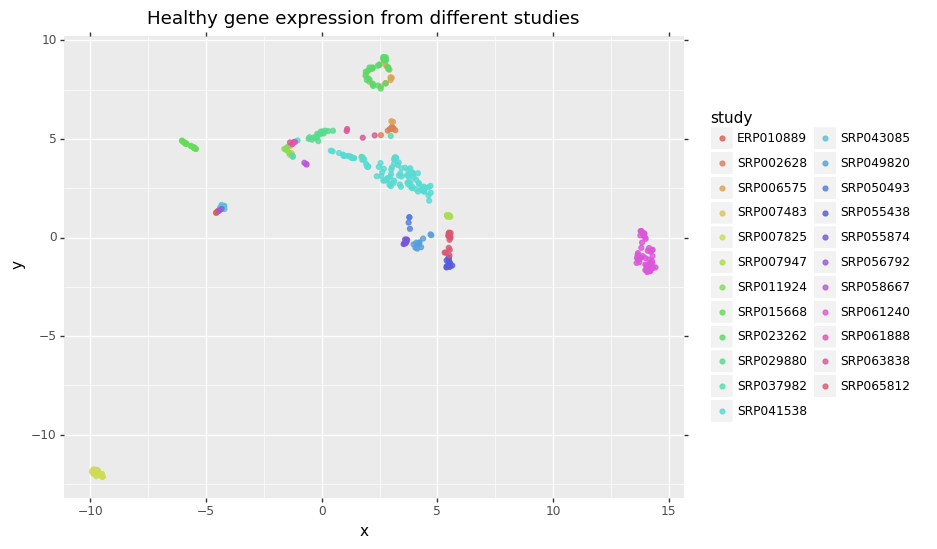

<ggplot: (8792345094769)>

In [70]:
ggplot(embedded_df, aes(x='x', y='y', color='study')) + \
geom_point(alpha=.8) + \
ggtitle('Healthy gene expression from different studies')

## Subset Studies

From the set of all labeled data (output by download_categorized_data.ipynb), extract the subset corresponding to blood (UBERON:0000178).

In [13]:
%%bash
SUBSET_OUT='../data/blood_expression'

python subset_studies.py ../data/plier_healthy.tsv ../data/plier_disease.tsv \
                         ../data/classifier_healthy.tsv ../data/classifier_disease.tsv \
                         ${SUBSET_OUT}/blood_plier ${SUBSET_OUT}/blood_classifier \
                         UBERON:0000178

In [71]:
blood_df = pandas.read_csv('../data/blood_expression/blood_plier_healthy.tsv', sep='\t')
blood_df.iloc[:5,:5]

,SRP055874.SRR1839799,SRP055874.SRR1839794,SRP055874.SRR1839800,SRP055874.SRR1839791,SRP055874.SRR1839802
TSPAN6,0.039835,0.023077,0.042356,0.144034,0.055544
TNMD,0.000000,0.000000,0.000000,0.000000,0.000000
DPM1,1.376255,3.026360,2.042377,4.568865,4.693783
SCYL3,1.445048,2.424698,2.336018,2.479390,2.597591
C1orf112,0.580451,0.897944,0.845607,1.073546,1.104008


In [72]:
reducer = umap.UMAP()
embedded_expression = reducer.fit_transform(blood_df.T)

In [73]:
embedded_df = pandas.DataFrame({'x': embedded_expression[:,0], 'y': embedded_expression[:,1]})
embedded_df['sample'] = blood_df.columns
split = embedded_df['sample'].str.split('.', expand=True)
embedded_df['sample'] = split[1]
embedded_df['study'] = split[0]
embedded_df.head()

,x,y,sample,study
0,-0.563101,13.201869,SRR1839799,SRP055874
1,-0.132055,12.546441,SRR1839794,SRP055874
2,-0.062565,12.500054,SRR1839800,SRP055874
3,0.021021,12.422792,SRR1839791,SRP055874
4,-0.254894,12.603352,SRR1839802,SRP055874


/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


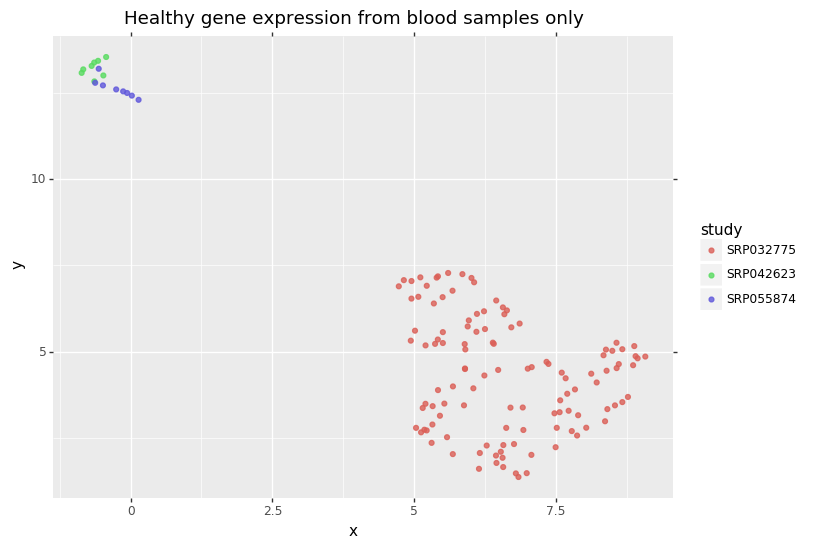

<ggplot: (-9223363244509674801)>

In [75]:
ggplot(embedded_df, aes(x='x', y='y', color='study')) + \
geom_point(alpha=.8) + \
ggtitle('Healthy gene expression from blood samples only')

## Train PLIER

Train PLIER for dimensionality reduction on a fraction of the studies with blood samples

In [20]:
%%bash
SUBSET_OUT='../data/blood_expression'
PLIER_OUT='../data/blood_plier'

# K_VALS stores the different values of k (number of PCs) to be used by PLIER.
# This array is intentionally reverse sorted for more efficient scheduling (you want
# the longest jobs to be loaded first)
K_VALS=(50)

# Pass each K_value to run_plier and execute the different instances in paralell
# The code before the pipe prints all the values of K on its own line
# The code after the pipe tells bash to run run_plier.R once for each value of K,
# But using no more than NUM_PROCESSES threads to do so
printf "${SUBSET_OUT}/blood_plier_healthy.tsv ${SUBSET_OUT}/blood_plier_disease.tsv $PLIER_OUT -k %s" \
       "${K_VALS[0]}" | xargs -n 5 --max-procs=4 Rscript run_plier.R

[1] 61.61938
[1] "L2 is set to 61.6193797084368"
[1] "L1 is set to 30.8096898542184"



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: PLIER
Loading required package: RColorBrewer
Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess

Loading required package: pheatmap
Loading required package: glmnet
Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-18

Loading required package: knitr
Loading required package: rsvd
Loading required package: qvalue
Selecting common genes: 6605
Removing 4 pathways with too few genes
Computing SVD
Done
errorY (SVD based:best possible) = 0.5928
Updating L3, current fraction= 0, target=0.7
0 positive columns at L3=0.5
0 positive columns at L3=0.250001
0 positive columns at L3=0.125001
1 positive columns at L3=0.062501
17 positive columns at L3=0.031251
42 positi

## Train Discriminator Model

In [83]:
%%bash
PLIER_OUT='../data/blood_plier'
SUBSET_OUT='../data/blood_expression'
python create_identity_matrix.py ${PLIER_OUT}/plier_${K_VALS[0]}_Z.tsv ${PLIER_OUT}/plier_all_Z.tsv

echo "All run_plier instances completed"

python create_identity_matrix_df.py ../data/blood_plier/plier_50_Z.tsv ../data/blood_plier/plier_all_Z.tsv

time python evaluate_models.py $PLIER_OUT ${SUBSET_OUT}/blood_classifier_healthy.tsv \
                               ${SUBSET_OUT}/blood_classifier_disease.tsv \
                               --out_path ../results/blood_eval_results.csv --epochs 400

All run_plier instances completed
247/247 [==============================] - 0s 79us/sample - loss: 5.5747 - acc: 0.7449 - auc_119: 0.7183


python: can't open file 'create_identity_matrix.py': [Errno 2] No such file or directory
/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np

In [84]:
import plotnine
plotnine.options.figure_size = (8,6)

In [85]:
# Load the dataframe generated by evaluate_models.py
result_df = pandas.read_csv('../results/blood_eval_results.csv', index_col=0)

result_df['acc_over_baseline'] = result_df['val_acc'] - result_df['val_baseline']

result_df.head()

,Model,LR,Seed,val_acc,val_auroc,val_baseline,lv_count,acc_over_baseline
0,IForest,0.00001,0,0.590551,0.385936,0.661417,6605,-0.070866
1,OCSVM,0.00001,0,0.661417,0.500000,0.661417,6605,0.000000
2,LogisticRegression,0.00001,0,0.598425,0.523256,0.661417,6605,-0.062992
3,MLP,0.00001,0,0.740157,0.627769,0.661417,6605,0.078740
4,TenLayerNet,0.00001,0,0.724409,0.512874,0.661417,6605,0.062992


## Plot Performance

/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/utils.py:69: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(val) and not is_string(val):
/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


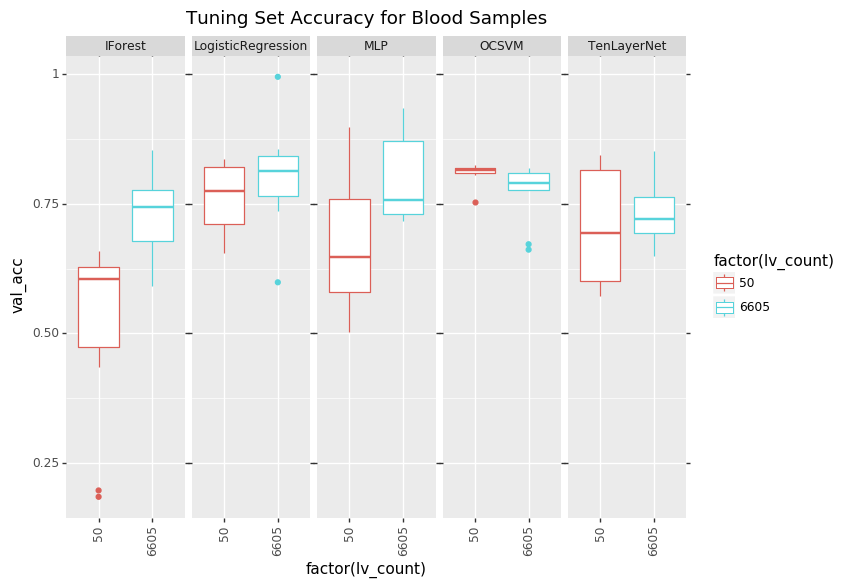

<ggplot: (-9223363244509808580)>

In [89]:
ggplot(result_df, aes(x='factor(lv_count)', y='val_acc', color='factor(lv_count)')) +\
geom_boxplot() +\
facet_grid('. ~ Model') +\
theme(axis_text_x=element_text(rotation=90, hjust=0.5)) +\
ggtitle('Tuning Set Accuracy for Blood Samples')

/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/utils.py:629: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat(lst, axis=axis, ignore_index=True)
/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/utils.py:69: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(val) and not is_string(val):
/home/ben/anaconda3/envs/brdnet/lib/pyt

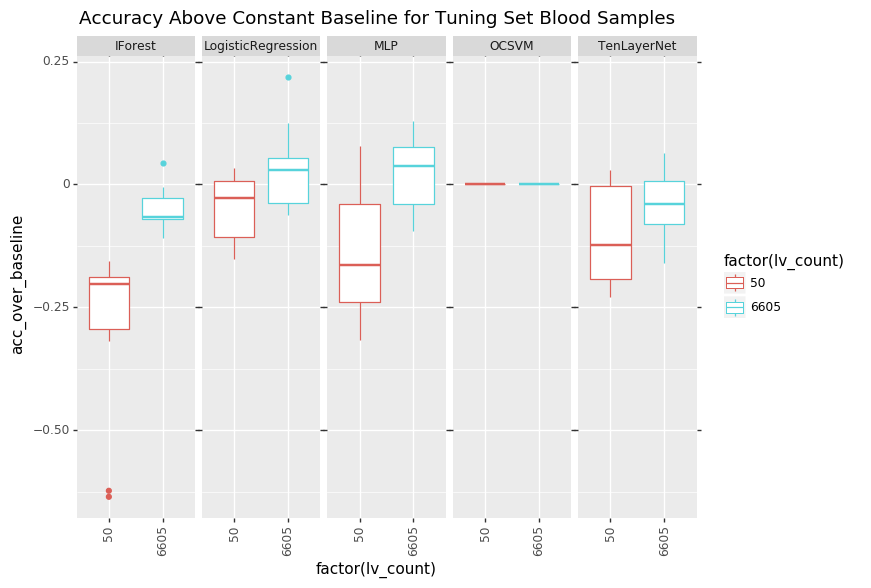

<ggplot: (-9223363244508809598)>

In [90]:
ggplot(result_df, aes(x='factor(lv_count)', y='acc_over_baseline', color='factor(lv_count)')) +\
geom_boxplot() +\
facet_grid('. ~ Model') +\
theme(axis_text_x=element_text(rotation=90, hjust=0.5)) +\
ggtitle('Accuracy Above Constant Baseline for Tuning Set Blood Samples')

/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/stats/stat.py:310: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  stats = pd.concat(stats, axis=0, ignore_index=True)
/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/utils.py:629: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and s

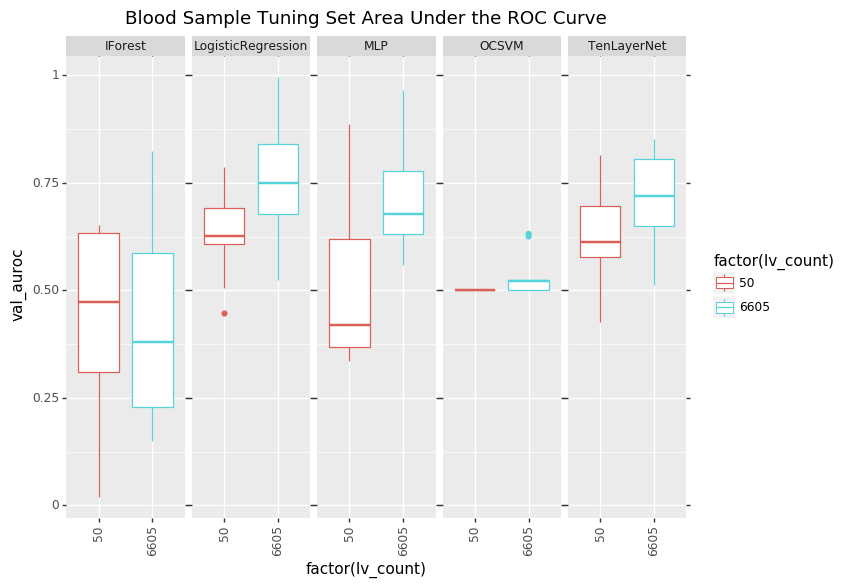

<ggplot: (-9223363244514263878)>

In [91]:
ggplot(result_df, aes(x='factor(lv_count)', y='val_auroc', color='factor(lv_count)')) +\
geom_boxplot() +\
facet_grid('. ~ Model') +\
theme(axis_text_x=element_text(rotation=90, hjust=0.5)) +\
ggtitle('Blood Sample Tuning Set Area Under the ROC Curve')